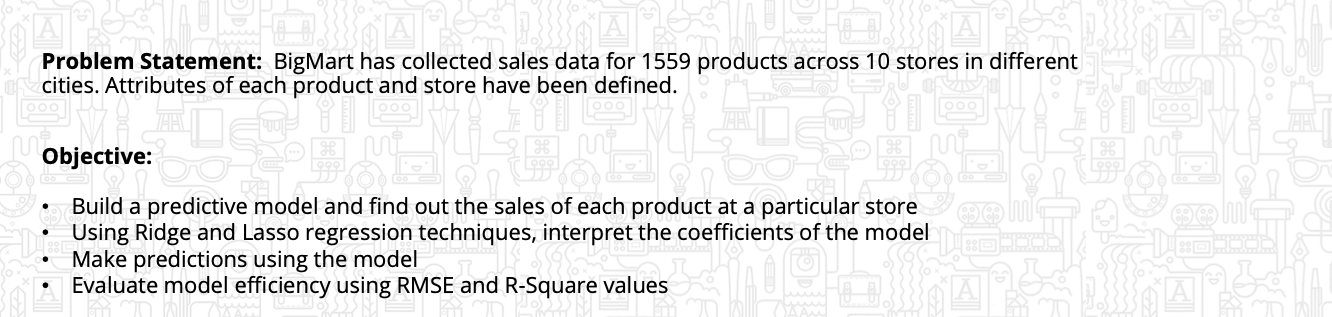

#### Factors affecting sales of the store:
1. Time of the day - Morning and Evening has more sales.
2. Time of the Week - Weekends has more sales.
3. Time of the year - Year end has more sales.
4. Store location - Sales is affected by store's locaton.
5. item rack size (or item visibility).

In [2]:
#Import the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
#Import the training data.
df = pd.read_csv("bigmart_train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
#Check the shape of the data.
df.shape

(8523, 12)

In [22]:
#Check for null values in the dataset.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
#Data Set description.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Univariate analysis of the attribute.

In [24]:
#Univarite Analysis on Item identifier.
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


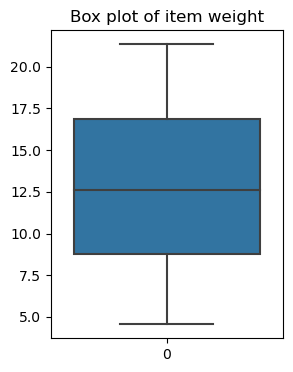

In [29]:
#Univarite Analysis on Item Weight.
plt.figure(figsize = (3,4))
sns.boxplot(df["Item_Weight"])
plt.title("Box plot of item weight")
print(df["Item_Weight"].describe())

In [31]:
#Univarite Analysis on Item Fat Content.
df["Item_Fat_Content"].unique()
#Observations: "low fat" and "LF" are same as "Low Fat". Also, "reg" is same as "Regular".

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [32]:
#Modifying the item fat content data.
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(['low fat', 'LF'],'Low Fat')
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(['reg'],'Regular')
print(df["Item_Fat_Content"].unique())

['Low Fat' 'Regular']


count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


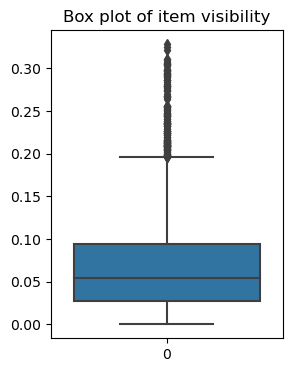

In [33]:
#Univarite Analysis on Item Visibility.
plt.figure(figsize = (3,4))
sns.boxplot(df["Item_Visibility"])
plt.title("Box plot of item visibility")
print(df["Item_Visibility"].describe())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<Axes: >

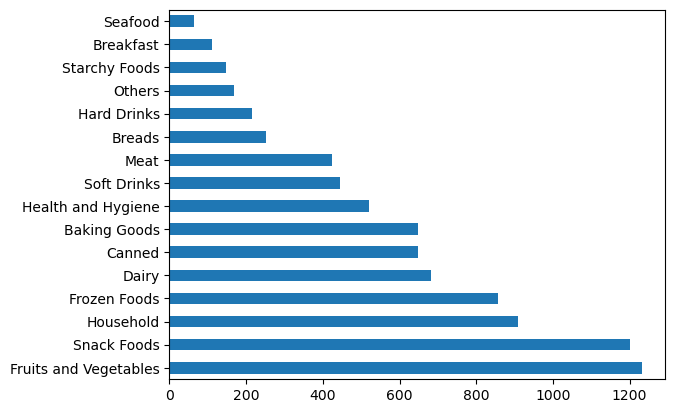

In [39]:
#Univarite Analysis on Item type.
print(df["Item_Type"].value_counts())
(df["Item_Type"].value_counts()).plot(kind = "barh")

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


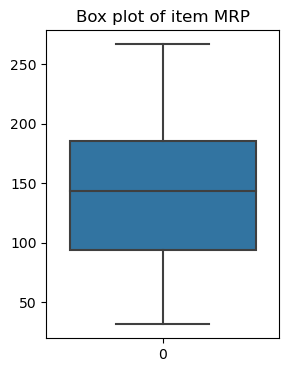

In [43]:
#Univarite Analysis on Item MRP.
plt.figure(figsize = (3,4))
sns.boxplot(df["Item_MRP"])
plt.title("Box plot of item MRP")
print(df["Item_MRP"].describe())

In [12]:
df["Outlet_Size"].mode()[0]

'Medium'

In [13]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(['low fat', 'LF'],'Low Fat')

In [14]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(['reg'],'Regular')

In [15]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [16]:
df["Outlet_Year"] = df["Outlet_Establishment_Year"] - 1985

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,24
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,13
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2


In [18]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [19]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)